In [87]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir("W:/TECH/VirginiaBeach/WO2/Task2-Data collection/noaa_data")

In [3]:
working_dir = r"W:/TECH/VirginiaBeach/WO2/Task2-Data collection/noaa_data"
working_fil = 'SP_normalized_JD.csv'
os.chdir(working_dir)         
Data = pd.read_csv(working_fil, 
                   delimiter=',',
                   usecols=(0,1),
                   infer_datetime_format=True,
                   skiprows=0
                  )
Data.columns = ['datetime','water_level']
Data['datetime'] = Data['datetime'].apply(pd.to_datetime)
Data.head(5)

datetime  water_level
0 1945-01-01 00:00:00      0.76529
1 1945-01-01 01:00:00      0.26329
2 1945-01-01 02:00:00     -0.33371
3 1945-01-01 03:00:00     -0.83571
4 1945-01-01 04:00:00     -1.13471

In [4]:
Data.set_index('datetime',inplace=True)

In [5]:
Data.head()

water_level
datetime                        
1945-01-01 00:00:00      0.76529
1945-01-01 01:00:00      0.26329
1945-01-01 02:00:00     -0.33371
1945-01-01 03:00:00     -0.83571
1945-01-01 04:00:00     -1.13471

In [6]:
Data.water_level

datetime
1945-01-01 00:00:00    0.765290
1945-01-01 01:00:00    0.263290
1945-01-01 02:00:00   -0.333710
1945-01-01 03:00:00   -0.835710
1945-01-01 04:00:00   -1.134710
1945-01-01 05:00:00   -1.134710
1945-01-01 06:00:00   -0.835710
1945-01-01 07:00:00   -0.333710
1945-01-01 08:00:00    0.364290
1945-01-01 09:00:00    0.965290
1945-01-01 10:00:00    1.365290
1945-01-01 11:00:00    1.565290
1945-01-01 12:00:00    1.263290
1945-01-01 13:00:00    0.863290
1945-01-01 14:00:00    0.263290
1945-01-01 15:00:00   -0.235710
1945-01-01 16:00:00   -1.036710
1945-01-01 17:00:00   -1.436710
1945-01-01 18:00:00   -1.636710
1945-01-01 19:00:00   -1.636710
1945-01-01 20:00:00   -1.334710
1945-01-01 21:00:00   -0.835710
1945-01-01 22:00:00   -0.235710
1945-01-01 23:00:00    0.263290
1945-01-02 00:00:00    0.164290
1945-01-02 01:00:00   -0.435710
1945-01-02 02:00:00   -0.835710
1945-01-02 03:00:00   -1.436710
1945-01-02 04:00:00   -1.734710
1945-01-02 05:00:00   -1.836710
                         ...   

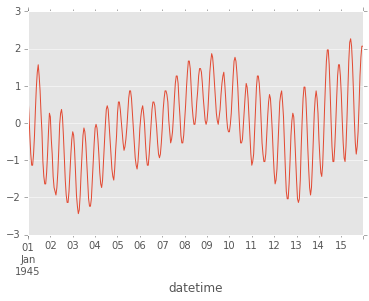

In [8]:
Data.water_level['19450101':'19450115'].plot()

In [92]:
water_level = Data['water_level'].tolist()
maximum_water_level=[]
for i in range(len(water_level)//656):
    maxwater = max(water_level[(i*656):((i+1)*656)])
    maximum_water_level.append(maxwater)

In [94]:
len(maximum_water_level)

934

In [37]:
years = range(1945,2009,1)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [59]:
maximums=[]
for year in years:
    for month in months:
        date = str(month+' '+str(year))
        monthlymax = (date,float(str('%.3f' %Data.water_level[date].max())))
        maximums.append(monthlymax)

In [61]:
max_water_levels = dict(maximums)

In [64]:
max_water_levels['January 2008']

1.72

In [82]:
df = pd.DataFrame(max_water_levels.items(), columns=['Date', 'waterlevel'])

In [85]:
df.waterlevel.max()

6.349

In [95]:
len(max_water_levels)

768

(array([ 0.03264351,  0.512095  ,  0.7365191 ,  0.34683725,  0.15913709,
         0.07548811,  0.02040219,  0.01224131,  0.00204022,  0.00816088]),
 array([ 1.10106955,  1.62584839,  2.15062723,  2.67540606,  3.2001849 ,
         3.72496374,  4.24974258,  4.77452142,  5.29930026,  5.82407909,
         6.34885793]),
 <a list of 10 Patch objects>)

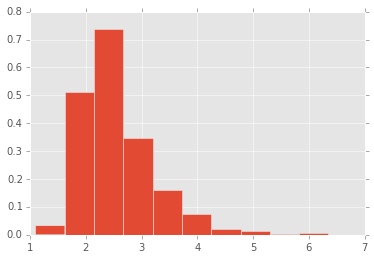

In [100]:
plt.hist(maximum_water_level,normed=1)

(array([ 0.01936908,  0.32443203,  0.74813058,  0.43096195,  0.19853303,
         0.08958198,  0.02421135,  0.01452681,  0.00242113,  0.00484227]),
 array([ 0.964 ,  1.5025,  2.041 ,  2.5795,  3.118 ,  3.6565,  4.195 ,
         4.7335,  5.272 ,  5.8105,  6.349 ]),
 <a list of 10 Patch objects>)

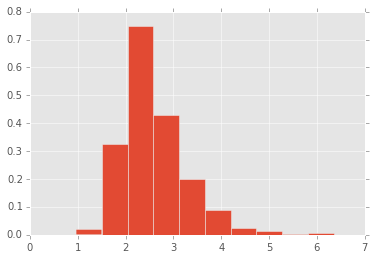

In [110]:
plt.hist(df.waterlevel[~np.isnan(df.waterlevel)],normed=1)

In [112]:
~np.isnan(df.waterlevel)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
738    True
739    True
740    True
741    True
742    True
743    True
744    True
745    True
746    True
747    True
748    True
749    True
750    True
751    True
752    True
753    True
754    True
755    True
756    True
757    True
758    True
759    True
760    True
761    True
762    True
763    True
764    True
765    True
766    True
767    True
Name: waterlevel, dtype: bool